In [2]:
import pandas as pd
from numpy import nan,shape
%pylab inline
print 'pandas version: ',pd.__version__
print 'numpy version:',np.__version__

Populating the interactive namespace from numpy and matplotlib
pandas version:  0.18.0
numpy version: 1.11.0


In [4]:
# read information about the stations
import pickle
Data_dir='../../Data/Weather'
stations=pickle.load(open(Data_dir+'/stations.pkl','r'))

In [5]:
#this code is using pandas dataframes
lons=stations.ix[:,'longitude'].values
lats=stations.ix[:,'latitude'].values
elev=stations.ix[:,'elevation'].values
station_names=stations.index.values
ll=len(lons)
lonmin=-180;lonmax=180;latsmin=-80;latsmax=80;
select=(lons>lonmin) * (lons<lonmax)*(lats>latsmin)*(lats<latsmax)
print sum(select)
station_names=station_names[select]
lons=lons[select]
lats=lats[select]
elev=elev[select]
elev=[min(3000,max(e,0))/3000. for e in elev]
print len(lons),len(lats),len(station_names),len(elev)

85273
85273 85273 85273 85273


#### Generate 2 other random fields besides elevation for plotting

In [6]:
dim2 = np.random.randint(-10, high=10, size=len(lons))
dim3 = np.random.randint(-100, high=100, size=len(lons))

### Finally we have 3 values of each station: elev, dim2 and dim3
Using HSV representation for each station

In [7]:
import math

def hsv2rgb(h, s, v):
    h = float(h)
    s = float(s)
    v = float(v)
    h60 = h / 60.0
    h60f = math.floor(h60)
    hi = int(h60f) % 6
    f = h60 - h60f
    p = v * (1 - s)
    q = v * (1 - f * s)
    t = v * (1 - (1 - f) * s)
    r, g, b = 0, 0, 0
    if hi == 0: r, g, b = v, t, p
    elif hi == 1: r, g, b = q, v, p
    elif hi == 2: r, g, b = p, v, t
    elif hi == 3: r, g, b = p, q, v
    elif hi == 4: r, g, b = t, p, v
    elif hi == 5: r, g, b = v, p, q
    r, g, b = int(r * 255), int(g * 255), int(b * 255)
    return "#%02x%02x%02x" % (r,g,b)

In [8]:
# Returns array with all elements between [0,1]
def normalize_array(array):
    array = np.array(array)
    array = array + abs(array.min())
    array = array * 1.0 / array.max()
    return array

In [9]:
# Takes the array vectors for each station and returns the corresponding RGB colors values for all stations
def get_colors(dim1, dim2, dim3):
    H = normalize_array(dim1) * 360 # varies from 0 to 360
    S = normalize_array(dim2) # varies from 0 to 1. Purity of color
    V = normalize_array(dim2) # varies from 0 to 1. Brightness of color
    colors = []
    for (h,s,v) in zip(H,S,V):
        colors.append(hsv2rgb(h,s,v))
    return colors
        

In [10]:
colors = get_colors(elev,dim2,dim3)

### Using Basemap

Basemap is a library for drawing maps and placing annotations on the maps.

To install basemap on your computer follow [these directions](https://github.com/matplotlib/basemap)

In this notebook we use "For more about scatter, see [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

The Mercator projection that is we use in this notebook is expained [here](http://matplotlib.org/basemap/users/merc.html)

(85273,) (85273,) (85273,)


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


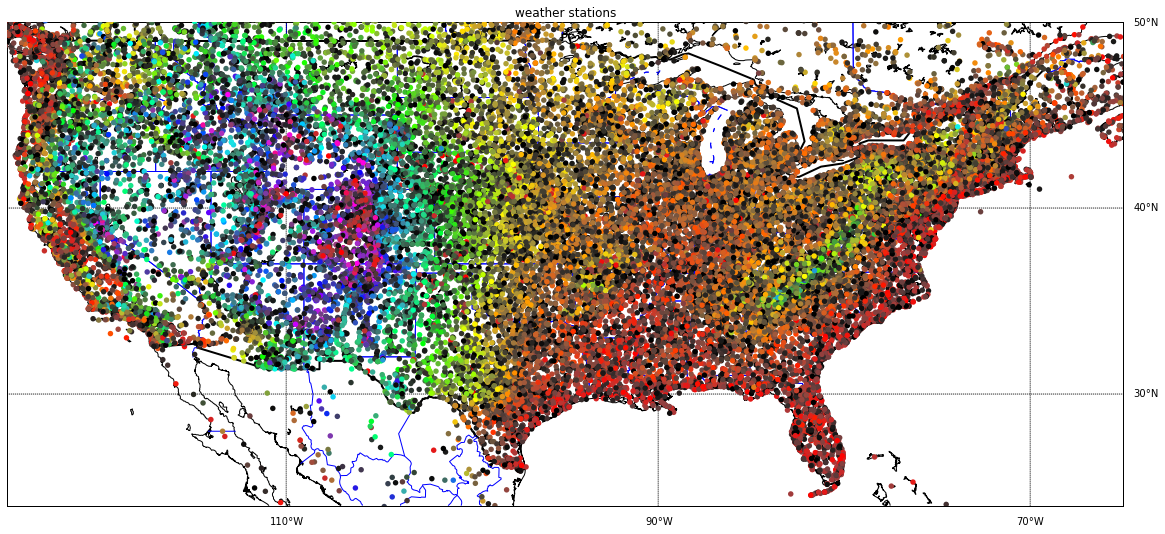

In [11]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'i' means use intermediate resolution coastlines.
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
# m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)
z=np.array(elev)*99
print shape(x),shape(y),shape(z)
m.scatter(x,y,30,colors,marker='o',edgecolors='none',zorder=10) 
#m.plot(x,y,'.g')
plt.title('weather stations')
plt.show()
